# importando bibliotecas

In [29]:
import pandas as pd
import seaborn as sns
import requests
import matplotlib.pyplot as plt
import plotly.express as px

# lendo dados

In [2]:
url = 'https://www.openligadb.de/api/getmatchdata/bl1/2023'

In [3]:
response = requests.get(url)

if response.status_code == 200:
    matches = response.json()
else:
    print(f"Erro ao acessar a API: {response.status_code}")
    matches = []

In [4]:
data = []
for match in matches:
    match_date = match['matchDateTimeUTC']
    home_team = match['team1']['teamName']
    away_team = match['team2']['teamName']
    home_score = match['matchResults'][-1]['pointsTeam1']
    away_score = match['matchResults'][-1]['pointsTeam2']
    
    data.append([match_date, home_team, away_team, home_score, away_score])

df = pd.DataFrame(data, columns=['Date', 'Home Team', 'Away Team', 'Home Score', 'Away Score'])

df['Date'] = pd.to_datetime(df['Date'])

df.head()

,Date,Home Team,Away Team,Home Score,Away Score
0,2023-08-18 18:30:00+00:00,Werder Bremen,FC Bayern München,0,4
1,2023-08-19 13:30:00+00:00,Bayer Leverkusen,RB Leipzig,3,2
2,2023-08-19 13:30:00+00:00,VfL Wolfsburg,1. FC Heidenheim 1846,2,0
3,2023-08-19 13:30:00+00:00,TSG 1899 Hoffenheim,SC Freiburg,1,2
4,2023-08-19 13:30:00+00:00,FC Augsburg,Borussia Mönchengladbach,4,4


# calculando vitorias, empates e derrotas

In [5]:
wins = []
loses = []
draws = []

for i in df.index:
    if df.iloc[i]['Home Score'] > df.iloc[i]['Away Score']:
        wins.append(df.iloc[i]['Home Team'])
        loses.append(df.iloc[i]['Away Team'])
    elif df.iloc[i]['Home Score'] < df.iloc[i]['Away Score']:
        loses.append(df.iloc[i]['Home Team'])
        wins.append(df.iloc[i]['Away Team'])
    else:
        draws.append(df.iloc[i]['Home Team'])
        draws.append(df.iloc[i]['Away Team'])

In [6]:
wins = pd.DataFrame(wins, columns=['Team'])
loses = pd.DataFrame(loses, columns=['Team'])
draws = pd.DataFrame(draws, columns=['Team'])

wins = wins['Team'].value_counts().reset_index()
loses = loses['Team'].value_counts().reset_index()
draws = draws['Team'].value_counts().reset_index()

wins.columns = ['Team', 'Count']
loses.columns = ['Team', 'Count']
draws.columns = ['Team', 'Count']

Text(0.5, 1.0, 'Times com mais vitorias')

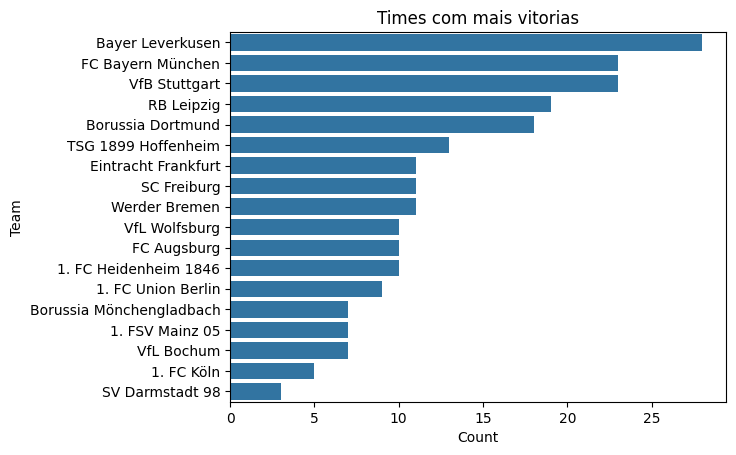

In [7]:
sns.barplot(data=wins, y = 'Team', x = 'Count')
plt.title('Times com mais vitorias')

Text(0.5, 1.0, 'Times com mais empates')

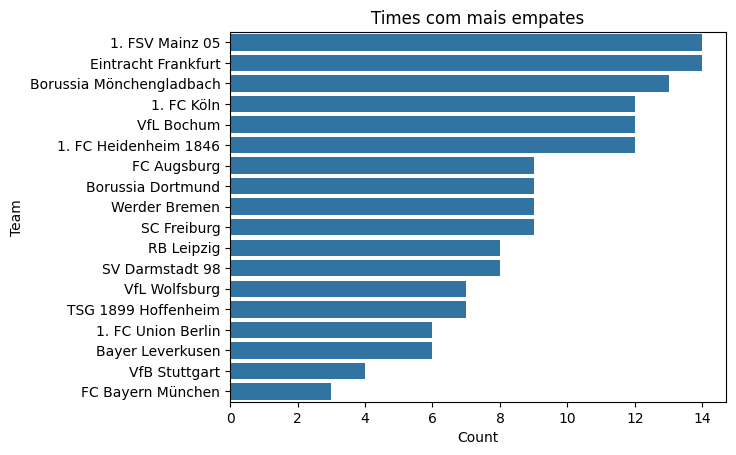

In [8]:
sns.barplot(data= draws, y = 'Team', x = 'Count')
plt.title('Times com mais empates')

Text(0.5, 1.0, 'Times com mais derrotas')

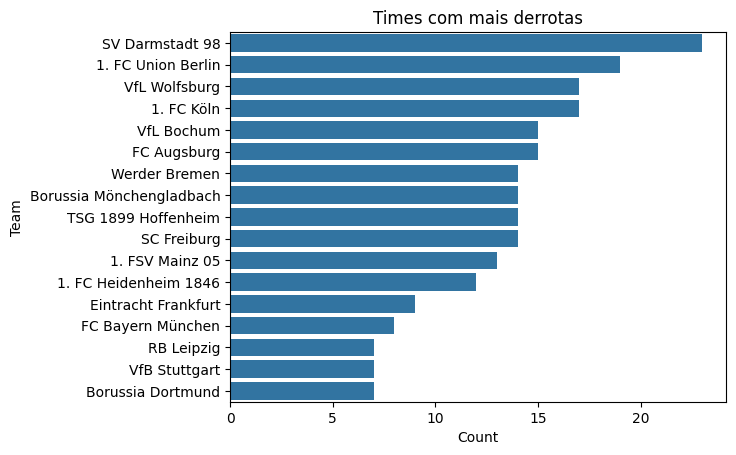

In [9]:
sns.barplot(data=loses, y = 'Team', x = 'Count')
plt.title('Times com mais derrotas')

O campeão Bayer Leverkusen não sofreu nenhuma derrota

# calculando numero de gols em casa e como visitante

In [10]:
home_score = df.groupby('Home Team')['Home Score'].sum().sort_values(ascending=False).reset_index()

home_score.columns = ['Team', 'Goals']

home_score

,Team,Goals
0,FC Bayern München,53
1,VfB Stuttgart,50
2,Bayer Leverkusen,47
3,RB Leipzig,40
4,Borussia Dortmund,37
5,TSG 1899 Hoffenheim,31
6,1. FC Heidenheim 1846,30
7,Werder Bremen,29
8,Eintracht Frankfurt,29
9,SC Freiburg,28


Text(0.5, 1.0, 'Times com mais gols em casa')

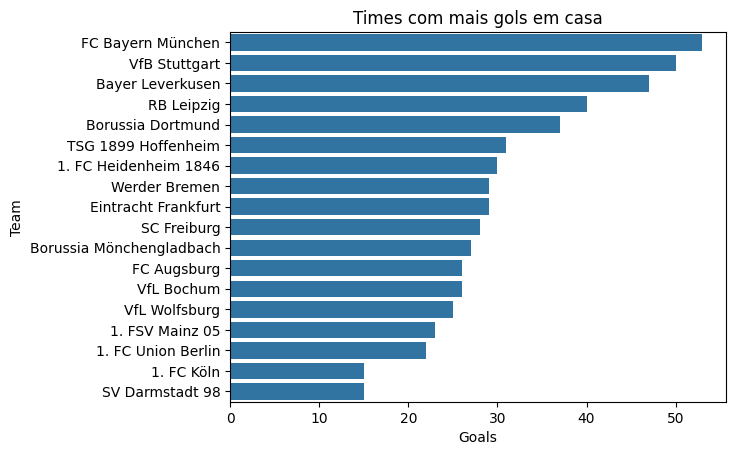

In [11]:
sns.barplot(data = home_score, y = 'Team', x = 'Goals')
plt.title('Times com mais gols em casa')

In [12]:
away_score = df.groupby('Away Team')['Away Score'].sum().sort_values(ascending=False).reset_index()

away_score.columns = ['Team', 'Goals']

away_score

,Team,Goals
0,Bayer Leverkusen,42
1,FC Bayern München,41
2,RB Leipzig,37
3,TSG 1899 Hoffenheim,35
4,Borussia Dortmund,31
5,Borussia Mönchengladbach,29
6,VfB Stuttgart,28
7,FC Augsburg,24
8,Eintracht Frankfurt,22
9,1. FC Heidenheim 1846,20


Text(0.5, 1.0, 'Times com mais gols como visitante')

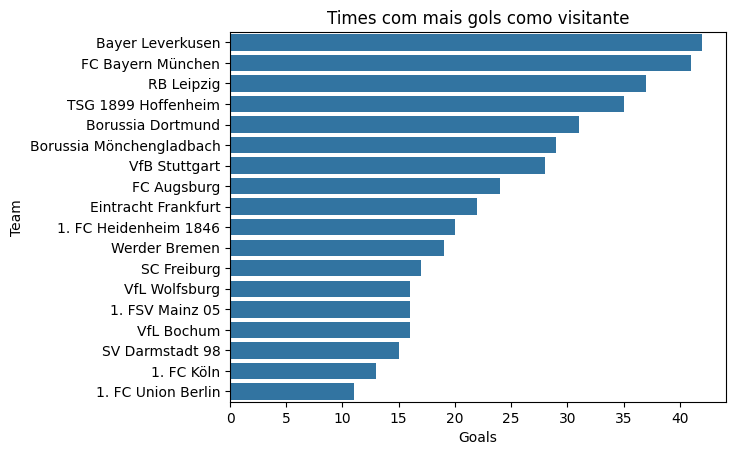

In [13]:
sns.barplot(data = away_score, y = 'Team', x = 'Goals')
plt.title('Times com mais gols como visitante')

In [14]:
total_score = pd.concat([home_score, away_score])

In [15]:
total_score = total_score.groupby('Team')['Goals'].sum().sort_values(ascending=False).reset_index()
total_score

,Team,Goals
0,FC Bayern München,94
1,Bayer Leverkusen,89
2,VfB Stuttgart,78
3,RB Leipzig,77
4,Borussia Dortmund,68
5,TSG 1899 Hoffenheim,66
6,Borussia Mönchengladbach,56
7,Eintracht Frankfurt,51
8,FC Augsburg,50
9,1. FC Heidenheim 1846,50


o campeão Bayer Leverkusen foi segundo time que mais marcou gols

Text(0.5, 1.0, 'Times com mais gols geral')

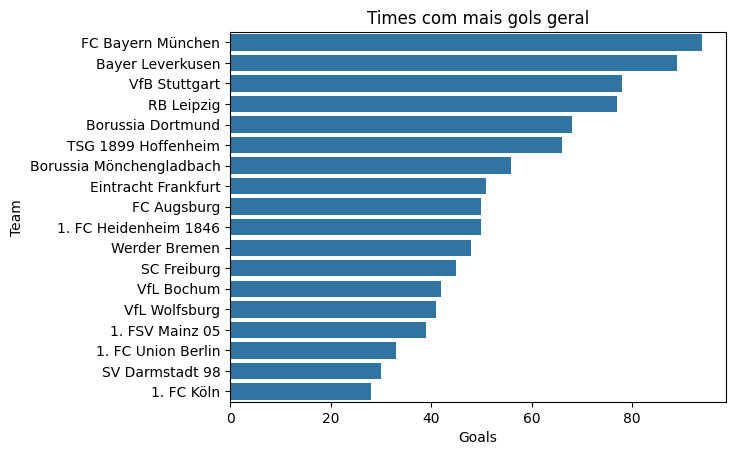

In [16]:
sns.barplot(data = total_score, y = 'Team', x = 'Goals')
plt.title('Times com mais gols geral')

# calculando tabela de pontuação

In [17]:
df['Home Win'] = (df['Home Score'] > df['Away Score']).astype(int)
df['Away Win'] = (df['Away Score'] > df['Home Score']).astype(int)

df['Home Points'] = df['Home Win'] * 3
df['Away Points'] = df['Away Win'] * 3
df['Draw Points'] = ((df['Home Score'] == df['Away Score']) * 1).astype(int)

home_points = df.groupby('Home Team')['Home Points'].sum().reset_index().rename(columns={'Home Team': 'Team', 'Home Points': 'Points'})
away_points = df.groupby('Away Team')['Away Points'].sum().reset_index().rename(columns={'Away Team': 'Team', 'Away Points': 'Points'})
total_points = pd.concat([home_points, away_points]).groupby('Team').sum().reset_index()
draw_points_home = df.groupby('Home Team')['Draw Points'].sum().reset_index().rename(columns={'Home Team': 'Team', 'Draw Points': 'Draw Points'})
draw_points_away = df.groupby('Away Team')['Draw Points'].sum().reset_index().rename(columns={'Away Team': 'Team', 'Draw Points': 'Draw Points'})
total_draw_points = pd.concat([draw_points_home, draw_points_away]).groupby('Team').sum().reset_index()

In [18]:
team_stats = total_points.merge(total_score, on='Team')
team_stats.sort_values('Points', ascending=False, inplace=True)
table = team_stats.drop('Goals', axis=1).reset_index()
table.drop('index', axis=1, inplace=True)

In [19]:
table = table.merge(total_draw_points, on='Team', how='left')
table['Points'] += table['Draw Points']
table.drop('Draw Points', axis=1, inplace=True)

In [20]:
table # tabela da temporada 23/24

,Team,Points
0,Bayer Leverkusen,90
1,FC Bayern München,72
2,VfB Stuttgart,73
3,RB Leipzig,65
4,Borussia Dortmund,63
5,TSG 1899 Hoffenheim,46
6,Werder Bremen,42
7,Eintracht Frankfurt,47
8,SC Freiburg,42
9,1. FC Heidenheim 1846,42


# variancia de posição durante o campeonato

In [21]:
positions = pd.DataFrame()

for date in df['Date'].unique():
    current_matches = df[df['Date'] <= date]
    home_points = current_matches.groupby('Home Team')['Home Points'].sum().reset_index().rename(columns={'Home Team': 'Team', 'Home Points': 'Points'})
    away_points = current_matches.groupby('Away Team')['Away Points'].sum().reset_index().rename(columns={'Away Team': 'Team', 'Away Points': 'Points'})
    total_points = pd.concat([home_points, away_points]).groupby('Team').sum().reset_index()
    total_points['Date'] = date
    total_points['Position'] = total_points['Points'].rank(method='min', ascending=False)
    positions = pd.concat([positions, total_points])

In [38]:
teams = ['Borussia Dortmund', 'Bayer Leverkusen']
team_positions = positions[positions['Team'].isin(teams)]

fig = px.line(team_positions, x='Date', y='Position', color='Team', markers=True,
              title=f'Posição dos times ao longo do campeonato',
              labels={'Date': 'Data', 'Position': 'Posição'})

fig.update_yaxes(autorange='reversed', range=[0,18])
fig.update_layout(xaxis_title='Data', yaxis_title='Posição')

fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': 'Team=Bayer Leverkusen<br>Data=%{x}<br>Posição=%{y}<extra></extra>',
              'legendgroup': 'Bayer Leverkusen',
              'line': {'color': '#636efa', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines+markers',
              'name': 'Bayer Leverkusen',
              'orientation': 'v',
              'showlegend': True,
              'type': 'scatter',
              'x': array([datetime.datetime(2023, 8, 19, 13, 30, tzinfo=datetime.timezone.utc),
                          datetime.datetime(2023, 8, 19, 16, 30, tzinfo=datetime.timezone.utc),
                          datetime.datetime(2023, 8, 20, 13, 30, tzinfo=datetime.timezone.utc),
                          datetime.datetime(2023, 8, 20, 15, 30, tzinfo=datetime.timezone.utc),
                          datetime.datetime(2023, 8, 25, 18, 30, tzinfo=datetime.timezone.utc),
                          datetime.datetime(2023, 8, 26, 13, 30, tzinfo=datetime.timezone.utc),
                          datetime.datetime(2023, 8, 26, 16, 30, tzinfo=datetime.timezone.utc),
                          datetime.datetime(2023, 8, 27, 13, 30, tzinfo=datetime.timezone.utc),
                          datetime.datetime(2023, 8, 27, 15, 30, tzinfo=datetime.timezone.utc),
                          datetime.datetime(2023, 9, 1, 18, 30, tzinfo=datetime.timezone.utc),
                          datetime.datetime(2023, 9, 2, 13, 30, tzinfo=datetime.timezone.utc),
                          datetime.datetime(2023, 9, 2, 16, 30, tzinfo=datetime.timezone.utc),
                          datetime.datetime(2023, 9, 3, 13, 30, tzinfo=datetime.timezone.utc),
                          datetime.datetime(2023, 9, 3, 15, 30, tzinfo=datetime.timezone.utc),
                          datetime.datetime(2023, 9, 15, 18, 30, tzinfo=datetime.timezone.utc),
                          datetime.datetime(2023, 9, 16, 13, 30, tzinfo=datetime.timezone.utc),
                          datetime.datetime(2023, 9, 16, 16, 30, tzinfo=datetime.timezone.utc),
                          datetime.datetime(2023, 9, 17, 13, 30, tzinfo=datetime.timezone.utc),
                          datetime.datetime(2023, 9, 17, 15, 30, tzinfo=datetime.timezone.utc),
                          datetime.datetime(2023, 9, 22, 18, 30, tzinfo=datetime.timezone.utc),
                          datetime.datetime(2023, 9, 23, 13, 30, tzinfo=datetime.timezone.utc),
                          datetime.datetime(2023, 9, 23, 16, 30, tzinfo=datetime.timezone.utc),
                          datetime.datetime(2023, 9, 24, 13, 30, tzinfo=datetime.timezone.utc),
                          datetime.datetime(2023, 9, 24, 15, 30, tzinfo=datetime.timezone.utc),
                          datetime.datetime(2023, 9, 29, 18, 30, tzinfo=datetime.timezone.utc),
                          datetime.datetime(2023, 9, 30, 13, 30, tzinfo=datetime.timezone.utc),
                          datetime.datetime(2023, 9, 30, 16, 30, tzinfo=datetime.timezone.utc),
                          datetime.datetime(2023, 10, 1, 13, 30, tzinfo=datetime.timezone.utc),
                          datetime.datetime(2023, 10, 1, 15, 30, tzinfo=datetime.timezone.utc),
                          datetime.datetime(2023, 10, 6, 18, 30, tzinfo=datetime.timezone.utc),
                          datetime.datetime(2023, 10, 7, 13, 30, tzinfo=datetime.timezone.utc),
                          datetime.datetime(2023, 10, 7, 16, 30, tzinfo=datetime.timezone.utc),
                          datetime.datetime(2023, 10, 8, 13, 30, tzinfo=datetime.timezone.utc),
                          datetime.datetime(2023, 10, 8, 15, 30, tzinfo=datetime.timezone.utc),
                          datetime.datetime(2023, 10, 8, 17, 30, tzinfo=datetime.timezone.utc),
                          datetime.datetime(2023, 10, 20, 18, 30, tzinfo=datetime.timezone.utc),
                          datetime.datetime(2023, 10, 21, 13, 30, tzinfo=datetime.timezone.utc),
    